In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Descripción del problema

Usaremos la base de datos: Beijing Multi-Site Air-Quality Data Data Set, la cual puede ser obtenida desde [https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data) (revisar la página para más detalles sobre los datos).

Se ha proporcionado un archivo csv con la información obtenida de la estación de monitoreo Aotizhongxin, el cual contiene 35,064 registros.

El objetivo es poder predecir la concetración de PM2.5 y de PM10 a partir de las variables año, mes, día, hora, temperatura, presión, punto de rocío, precipitación y velocidad del viento.

# Part 1: Load data

### When running in Google Colab, run the next cell to upload the CSV

In [2]:
# Requiered to select a file from your HD
from google.colab import files
uploaded = files.upload()

Saving PRSA_Aotizhongxin.csv to PRSA_Aotizhongxin.csv


### Read the data

In [12]:
# Import file and store it in a data frame
df = pd.read_csv('PRSA_Aotizhongxin.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df
# Quedan 31,815 registros despues de eliminar NaN's

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# Part 2: Format data and split it into numpy arrays

In [13]:
# AUX function to put categorical data into one-hot encoding format
def winddir_to_categorical(winddir):
  enc = OneHotEncoder(sparse=False)
  WD = enc.fit_transform(winddir)
  print("== categories:", enc.categories_, "==")
  return WD, [item for sublist in enc.categories_ for item in sublist]

== categories: [array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)] ==
Input values X with shape (31815, 28). With values


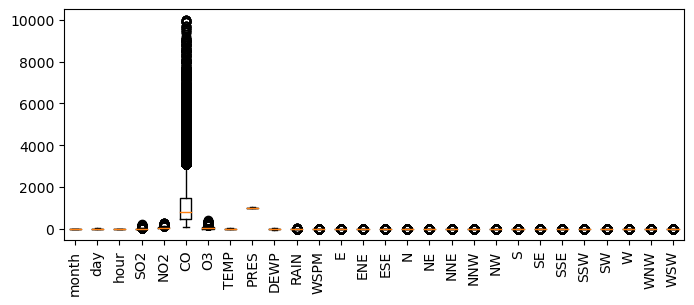

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,...,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.0000,31815.000000
mean,6.401886,15.578564,11.624800,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,...,0.044507,0.053748,0.038158,0.039101,0.029672,0.060349,0.095772,0.033601,0.0314,0.062706
std,3.416847,8.794954,6.926874,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,...,0.206223,0.225524,0.191581,0.193838,0.169682,0.238136,0.294284,0.180201,0.1744,0.242438
min,1.000000,1.000000,0.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,3.000000,8.000000,6.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,6.000000,15.000000,12.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
75%,9.000000,23.000000,18.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
max,12.000000,31.000000,23.000000,229.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


In [14]:
# Extract input features and convert them to a numpy array
labels = ['month',	'day',	'hour', 'SO2',	'NO2',	'CO',	'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM' ]
X = df[labels].to_numpy()
WD, categories = winddir_to_categorical(df[['wd']])
X = np.concatenate((X, WD), axis=1)

print(f"Input values X with shape {X.shape}. With values")

plt.figure(figsize=(8, 3))
plt.boxplot(X)
plt.xticks(range(1, 29), labels + categories, rotation=90)
plt.show()

pd.DataFrame(X).describe()

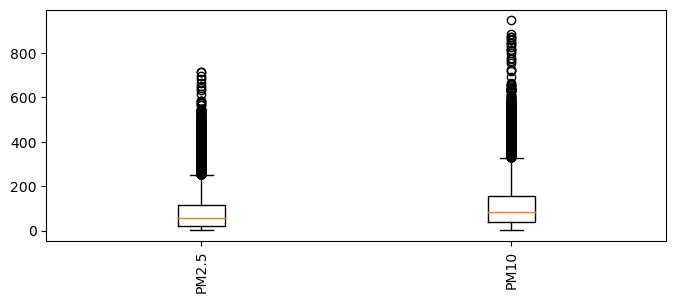

,0,1
count,31815.00000,31815.000000
mean,81.86363,109.120685
std,80.44949,93.718017
min,3.00000,2.000000
25%,22.00000,37.000000
50%,58.00000,86.000000
75%,114.00000,154.000000
max,713.00000,948.000000


In [15]:
# Extract output features and convert them to a numpy array
Y = df[['PM2.5', 'PM10']].to_numpy()

plt.figure(figsize=(8, 3))
plt.boxplot(Y)
plt.xticks(range(1, 3), ['PM2.5', 'PM10'], rotation=90)
plt.show()

pd.DataFrame(Y).describe()

In [16]:
# Split data into train+val and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28633, 28)
(28633, 2)
(3182, 28)
(3182, 2)


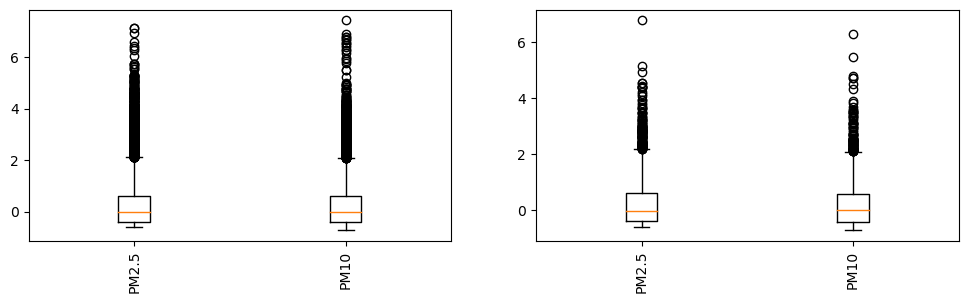

,0,1
count,28633.000000,28633.000000
mean,0.260636,0.200925
std,0.875615,0.808977
min,-0.597826,-0.724138
25%,-0.391304,-0.413793
50%,0.000000,0.000000
75%,0.608696,0.586207
max,7.119565,7.431034


In [17]:
# Normalize (zero-center) and standardize (scale) output data
scalerY = RobustScaler()
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.transform(y_test)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.boxplot(y_train)
plt.xticks(range(1, 3), ['PM2.5', 'PM10'], rotation=90)
plt.subplot(1, 2, 2)
plt.boxplot(y_test)
plt.xticks(range(1, 3), ['PM2.5', 'PM10'], rotation=90)
plt.show()

pd.DataFrame(y_train).describe()

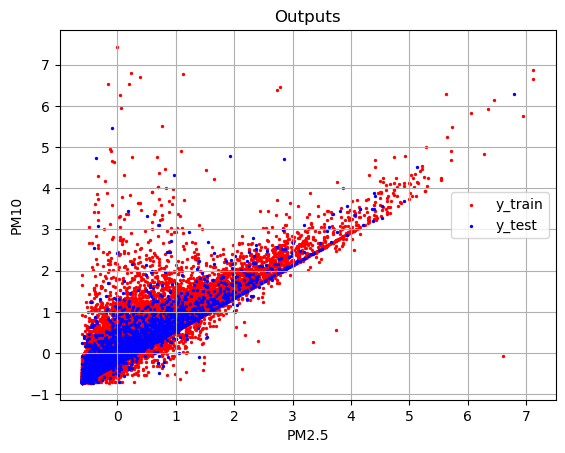

In [18]:
# Plot y_test
# Esta gráfica es para ver sólo si los sets de entrenamiento y test cubren las mismas
# áreas (¿tienen la misma distribución?). No se espera que los puntos coincidan ya que
# son dos sets distintos.
plt.scatter(y_train[:, 0], y_train[:, 1], c='r', s=2, label='y_train')
plt.scatter(y_test[:, 0], y_test[:, 1], c='b', s=2, label='y_test')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Outputs')
plt.show()

# Part 3: Create DNN models and train them

[https://www.youtube.com/watch?v=Z9lQ1hzJFe8](https://www.youtube.com/watch?v=Z9lQ1hzJFe8)

[https://www.youtube.com/watch?v=Lx16T9cl5ng](https://www.youtube.com/watch?v=Lx16T9cl5ng)

[https://github.com/krishnaik06/Keras-Tuner/blob/main/Hidden%20Layers%20And%20Hidden%20Neurons.ipynb](https://github.com/krishnaik06/Keras-Tuner/blob/main/Hidden%20Layers%20And%20Hidden%20Neurons.ipynb)

[https://www.tensorflow.org/tutorials/keras/keras_tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner)

[https://keras.io/keras_tuner/](https://keras.io/keras_tuner/)

[https://keras.io/guides/keras_tuner/getting_started/](https://keras.io/guides/keras_tuner/getting_started/)

[https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html?_gl=1*1kyglir*_ga*NDE3NTA3MzMzLjE2Njg1MzgxMDc.*_ga_W0YLR4190T*MTY3NDQ5MjM3OC42LjEuMTY3NDQ5MjY3MC4wLjAuMA](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html?_gl=1*1kyglir*_ga*NDE3NTA3MzMzLjE2Njg1MzgxMDc.*_ga_W0YLR4190T*MTY3NDQ5MjM3OC42LjEuMTY3NDQ5MjY3MC4wLjAuMA)

[https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams)

[https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f](https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f)

### To install Keras-tuner:

`!pip install -q -U keras-tuner`

`!conda install -c conda-forge keras-tuner`

In [19]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

2023-02-12 12:52:12.714284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Part 3.1: DNN with custom functions

In [20]:
# Create a Deep Network
DNN = Sequential()
DNN.add(InputLayer(input_shape=x_train.shape[1:], name='INPUT'))

DNN.add(Dense(units=1024, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=256, activation='relu'))

DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              29696     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 OUTPUT (Dense)              (None, 2)                 514       
                                                                 
Total params: 686,338
Trainable params: 686,338
Non-trainable params: 0
_________________________________________________________________


2023-02-12 12:52:46.213196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
def r_square(y, y_hat):
  """ Define R square loss, to use it as metric during training
  """
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_hat)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  return tf.subtract(1.0, residual / total)

In [25]:
def my_mse(y, y_hat):
  """ Define MSE loss, to use it as loss function
  """
  return tf.reduce_mean(tf.square(y - y_hat))

### Define training parameters
### Option 1: Usar un optimizador predefinido, pero con hyperparams no estándar

`from tensorflow.keras.optimizers import SGD`

`sgd = SGD(learning_rate=0.02, momentum=0.6)`

`DNN.compile(optimizer=sgd, loss='mse')`

### Option 2: Usar optimizador predefinido, con una pérdida custom, e incluir otras métricas de monitoreo

In [27]:
DNN.compile(optimizer='adam', loss=my_mse, metrics=['mape', r_square])

# Try with different optimizers
#DNN.compile(optimizer=???, loss='mse')

In [28]:
# Train model
H = DNN.fit(x=x_train, y=y_train, batch_size=128, epochs=30, validation_split=0.1)

Epoch 1/30
202/202 [==============================] - 2s 7ms/step - loss: 645.0300 - mape: 17281422.0000 - r_square: -1014.3657 - val_loss: 1.4894 - val_mape: 5112472.5000 - val_r_square: -1.2085
Epoch 2/30
202/202 [==============================] - 1s 6ms/step - loss: 2.1021 - mape: 3228620.5000 - r_square: -2.0498 - val_loss: 0.3663 - val_mape: 2009223.6250 - val_r_square: 0.4802
Epoch 3/30
202/202 [==============================] - 1s 6ms/step - loss: 7.3881 - mape: 5571112.0000 - r_square: -9.3002 - val_loss: 1.5686 - val_mape: 4590369.5000 - val_r_square: -1.3090
Epoch 4/30
202/202 [==============================] - 1s 6ms/step - loss: 0.4076 - mape: 1733862.6250 - r_square: 0.4160 - val_loss: 0.4344 - val_mape: 1371123.2500 - val_r_square: 0.4109
Epoch 5/30
202/202 [==============================] - 1s 6ms/step - loss: 0.3385 - mape: 1619631.0000 - r_square: 0.5192 - val_loss: 0.3451 - val_mape: 1478171.7500 - val_r_square: 0.5158
Epoch 6/30
202/202 [=============================

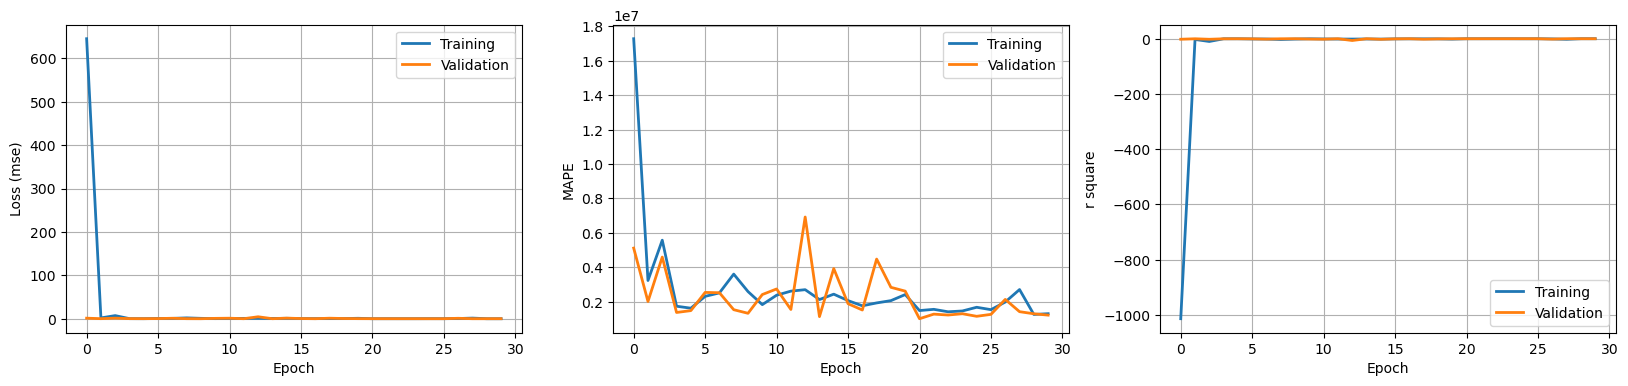

In [29]:
# Plot loss
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(DNN.history.history['mape'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_mape'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(DNN.history.history['r_square'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_r_square'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('r square')
plt.grid()
plt.show()

In [30]:
# Compute test loss
loss_test = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss, MAPE, and r2:", loss_test)

Test loss, MAPE, and r2: [0.2714153528213501, 768953.6875, 0.5971475839614868]


In [31]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)

100/100 [==============================] - 0s 1ms/step
(3182, 2)


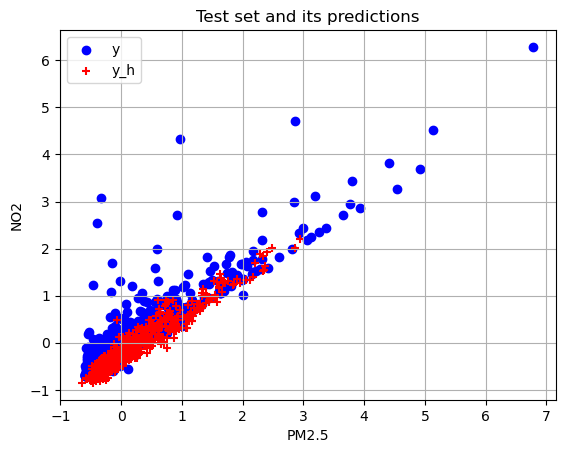

In [32]:
# Plot y_test_hat
indx = np.random.permutation(len(y_test))[:500]
plt.scatter(y_test[indx, 0], y_test[indx, 1], c='b', label='y')
plt.scatter(y_test_hat[indx, 0], y_test_hat[indx, 1], c='r', marker='+', label='y_h')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Test set and its predictions')
plt.show()

# 3.2 Auto tuning of hyperparams: number of units and optimizer

In [33]:
def model_builder(hp):
  ''' Define a auxiliar function to create DNN models with varying
      hyperparameters.
  '''
  model = Sequential()
  model.add(InputLayer(input_shape=x_train.shape[1:], name='INPUT'))

  # Choose an optimal number of units for the unique hidden layer between 64-1024
  hp_units = hp.Int('units', min_value=64, max_value=1024, step=64)
  model.add(Dense(units=hp_units, activation='relu'))
  # Add output layer
  model.add(Dense(units=y_train.shape[1], name='OUTPUT'))

  # Choose best optimizer
  model.compile(optimizer=hp.Choice('optimizer', values=['sgd', 'adam', 'adagrad', 'adadelta']), loss='mse', metrics=['mape'])
  
  return model

In [35]:
# Create a tuner and show the search space
tuner = RandomSearch(model_builder,
                     objective='val_loss',
                     max_trials=32)

tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 64, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adagrad', 'adadelta'], 'ordered': False}


In [36]:
# Make an initial quick exploration of the hyperparam space
tuner.search(x_train, y_train, epochs=10, validation_split=0.1)

Trial 32 Complete [00h 00m 05s]
val_loss: 177.60952758789062

Best val_loss So Far: 0.295664519071579
Total elapsed time: 00h 02m 46s
INFO:tensorflow:Oracle triggered exit


In [37]:
# Get the top model
best_models = tuner.get_best_models()
best_model = best_models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 960)               27840     
                                                                 
 OUTPUT (Dense)              (None, 2)                 1922      
                                                                 
Total params: 29,762
Trainable params: 29,762
Non-trainable params: 0
_________________________________________________________________


In [38]:
# See top best results
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 960
optimizer: adagrad
Score: 0.295664519071579
Trial summary
Hyperparameters:
units: 704
optimizer: adagrad
Score: 0.2957020699977875
Trial summary
Hyperparameters:
units: 1024
optimizer: adagrad
Score: 0.3005922734737396
Trial summary
Hyperparameters:
units: 640
optimizer: adam
Score: 0.35189780592918396
Trial summary
Hyperparameters:
units: 384
optimizer: adam
Score: 0.37345537543296814
Trial summary
Hyperparameters:
units: 576
optimizer: adagrad
Score: 0.3838427662849426
Trial summary
Hyperparameters:
units: 512
optimizer: adam
Score: 0.3857128918170929
Trial summary
Hyperparameters:
units: 768
optimizer: adam
Score: 0.4489223062992096
Trial summary
Hyperparameters:
units: 128
optimizer: adam
Score: 0.45094916224479675
Trial summary
Hyperparameters:
units: 1024
optimizer: adam
Score: 0.47330793738365173


In [39]:
# Retrieve the best combination of hyperparams
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 960, 'optimizer': 'adagrad'}

In [40]:
# Create a new model using the best hyperparams
DNN = model_builder(best_hps)
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 960)               27840     
                                                                 
 OUTPUT (Dense)              (None, 2)                 1922      
                                                                 
Total params: 29,762
Trainable params: 29,762
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Full training of best model
H = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_split=0.1)

Epoch 1/100
403/403 [==============================] - 1s 969us/step - loss: 19.9220 - mape: 5431100.0000 - val_loss: 0.8043 - val_mape: 2986746.7500
Epoch 2/100
403/403 [==============================] - 0s 758us/step - loss: 0.5625 - mape: 2341133.2500 - val_loss: 0.5115 - val_mape: 1868259.7500
Epoch 3/100
403/403 [==============================] - 0s 792us/step - loss: 0.4206 - mape: 1816691.7500 - val_loss: 0.4380 - val_mape: 1501814.0000
Epoch 4/100
403/403 [==============================] - 0s 735us/step - loss: 0.3660 - mape: 1651782.0000 - val_loss: 0.4359 - val_mape: 2014183.3750
Epoch 5/100
403/403 [==============================] - 0s 716us/step - loss: 0.3345 - mape: 1599343.3750 - val_loss: 0.3629 - val_mape: 1834508.8750
Epoch 6/100
403/403 [==============================] - 0s 732us/step - loss: 0.3100 - mape: 1578467.5000 - val_loss: 0.3344 - val_mape: 1718284.1250
Epoch 7/100
403/403 [==============================] - 0s 729us/step - loss: 0.2996 - mape: 1549047.6250 

# 3.2 Auto tuning of hyperparams: number of layers, number of units, and optimizer

In [47]:
def model_builder(hp):
  ''' Define a auxiliar function to create DNN models with varying
      hyperparameters.
  '''
  model = Sequential()
  model.add(InputLayer(input_shape=x_train.shape[1:], name='INPUT'))

  # Choose optimal number of layers between 2 and 8
  for i in range(hp.Int('num_layers', 2, 8)):
    # Tune the number of units in the each dense layer
    hp_units = hp.Int('units_'+str(i), min_value=64, max_value=1024, step=64)
    model.add(Dense(units=hp_units, activation='relu'))
  # Add output layer
  model.add(Dense(units=y_train.shape[1], name='OUTPUT'))

  # Choose best optimizer
  model.compile(optimizer=hp.Choice('optimizer', values=['sgd', 'adam', 'adagrad', 'adadelta']), loss='mse', metrics=['mape'])
  
  return model

In [45]:
def model_builder(hp):
  model = Sequential()
  model.add(InputLayer(input_shape=x_train.shape[1:], name='INPUT'))

  # Choose an optimal number of units between 64-1024
  #hp_units = hp.Int('units', min_value=64, max_value=1024, step=64)
  # Choose optimal number of layers between 2 and 8
  for i in range(hp.Int('layers', 2, 8)):
    model.add(Dense(units=hp.Int('units_' + str(i), min_value=64, max_value=1024, step=64), activation='relu'))
    #model.add(Dense(units=hp_units, activation='relu'))
  # Add output layer
  model.add(Dense(units=y_train.shape[1], name='OUTPUT'))

  # Choose best optimizer
  model.compile(optimizer=hp.Choice('optimizer', values=['sgd', 'adam', 'adagrad', 'adadelta']), loss='mse', metrics=['mape'])
  
  return model

In [48]:
# Create a tuner and show the search space
tuner = RandomSearch(model_builder,
                     objective='val_loss',
                     max_trials=64)

tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 64, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adagrad', 'adadelta'], 'ordered': False}


In [49]:
# Make an initial quick exploration of the hyperparam space
tuner.search(x_train, y_train, epochs=10, validation_split=0.1)

Trial 64 Complete [00h 01m 08s]
val_loss: nan

Best val_loss So Far: 0.2209615260362625
Total elapsed time: 00h 24m 18s
INFO:tensorflow:Oracle triggered exit


In [50]:
# Get the top model
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 448)               29120     
                                                                 
 dense_2 (Dense)             (None, 320)               143680    
                                                                 
 dense_3 (Dense)             (None, 256)               82176     
                                                                 
 dense_4 (Dense)             (None, 832)               213824    
                                                                 
 dense_5 (Dense)             (None, 64)                53312     
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [51]:
# Create a new model using the best hyperparams
DNN = model_builder(tuner.get_best_hyperparameters()[0])
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1856      
                                                                 
 dense_9 (Dense)             (None, 448)               29120     
                                                                 
 dense_10 (Dense)            (None, 320)               143680    
                                                                 
 dense_11 (Dense)            (None, 256)               82176     
                                                                 
 dense_12 (Dense)            (None, 832)               213824    
                                                                 
 dense_13 (Dense)            (None, 64)                53312     
                                                                 
 dense_14 (Dense)            (None, 64)               

In [52]:
# Full training of best model
H = DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_split=0.1)

Epoch 1/100
403/403 [==============================] - 2s 4ms/step - loss: 1.9174 - mape: 2129086.2500 - val_loss: 0.3785 - val_mape: 2017393.1250
Epoch 2/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2821 - mape: 1479335.8750 - val_loss: 0.2949 - val_mape: 1461430.1250
Epoch 3/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2631 - mape: 1480384.2500 - val_loss: 0.2870 - val_mape: 1120030.5000
Epoch 4/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2418 - mape: 1334028.0000 - val_loss: 0.2885 - val_mape: 1591342.8750
Epoch 5/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2341 - mape: 1298227.2500 - val_loss: 0.2519 - val_mape: 1544640.0000
Epoch 6/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2297 - mape: 1342679.8750 - val_loss: 0.2792 - val_mape: 1604821.5000
Epoch 7/100
403/403 [==============================] - 1s 3ms/step - loss: 0.2267 - mape: 1360397.3750 - val_loss: 0.2

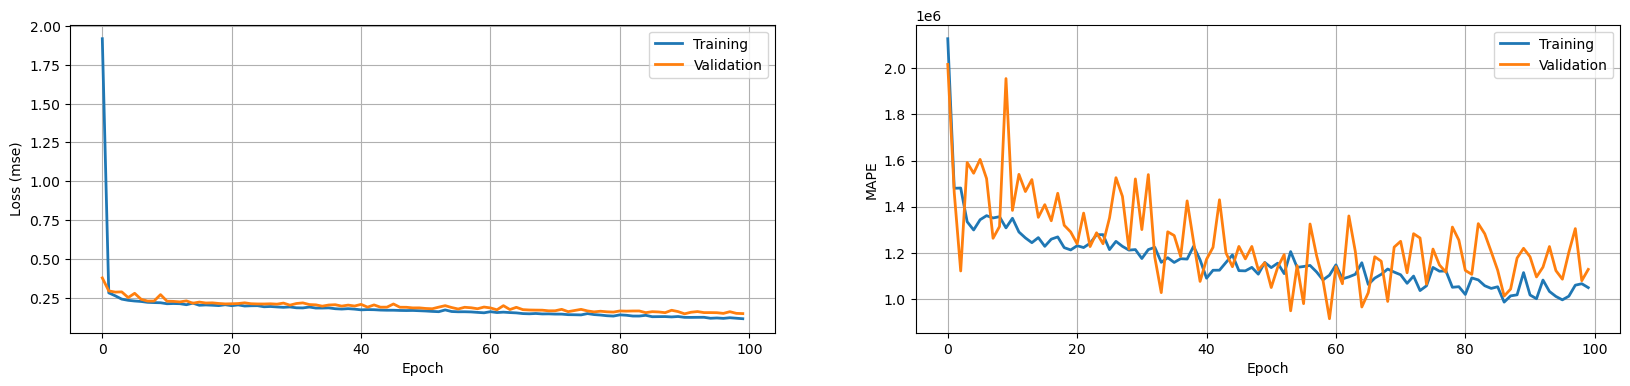

In [53]:
# Plot loss
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['mape'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_mape'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.grid()
plt.show()

In [54]:
# Compute test loss
loss_test = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss and MAPE:", loss_test)

Test loss and MAPE: [0.13817720115184784, 711213.6875]


In [55]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)

100/100 [==============================] - 0s 1ms/step
(3182, 2)


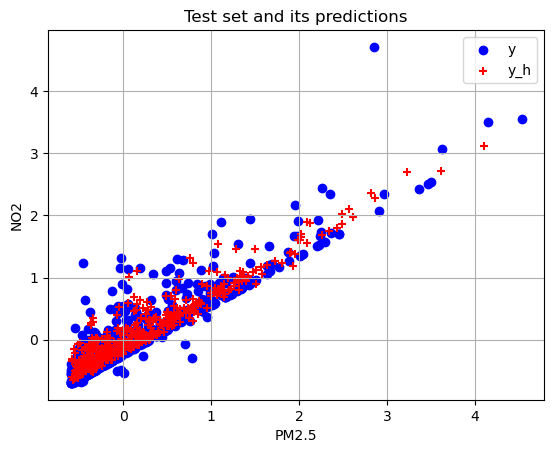

In [56]:
# Plot y_test_hat
indx = np.random.permutation(len(y_test))[:500]
plt.scatter(y_test[indx, 0], y_test[indx, 1], c='b', label='y')
plt.scatter(y_test_hat[indx, 0], y_test_hat[indx, 1], c='r', marker='+', label='y_h')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Test set and its predictions')
plt.show()

# Part 4: save model to disk and load ti back

In [25]:
# Save model to disk, then delete it
DNN.save("my_DNN_model.h5")

del DNN

In [26]:
# Load model back into memory, and use it for prediction
from tensorflow.keras.models import load_model
DNN = load_model("my_DNN_model.h5")

y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)

100/100 [==============================] - 0s 1ms/step
(3182, 2)
